## PCA to visualize functional dependence between PIC and O

In the context of behaviour science, there are three main types of input feautes, namely

1. Population characteristics (P): example - Min. age, Mean age, education levels etc.
2. Interventions (I): example - Goal setting, Planning, Rewards etc.
3. Context of the study (C): example - Follow up period, etc.
4. An Outcome of the study (O) indicating what percentage of people quit smoking.

In order to figure out if there's a functional dependence between the output (O) and the inputs (PIC), i.e., whether
$$
O = \phi(P, I, C),
$$
we apply PCA to reduce the dimensionality of the input space, and apply a threshold to binarize the outcome variable. 

In [ ]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.io import arff
%matplotlib inline 

In [103]:
# A simplified version of the inputs with only the numeric features
CSV_TRAIN_FILE = '../weka/train.3909808.arff.simple'
data, meta = arff.loadarff(CSV_TRAIN_FILE)

In [136]:
class DataWithLabel:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

def makeData(data, thresh=15):
    X = []
    Y = []
    for rcd in data:
        x = list(rcd)
        y = x[-1]
        if y > thresh:
            o = 1
        else:
            o = 0
        Y.append(o)        
        X.append(x[:-1])

    return DataWithLabel(X, Y)

# Do PCA after scaling
def doPCA(X):
    pca = PCA(n_components=2)
    X = StandardScaler().fit_transform(X)

    principalComponents = pca.fit_transform(X)
    return principalComponents

# Use the thresh parameter to control the output binarization
XY = makeData(data, thresh=5)
v = doPCA(XY.X)
v_y = DataWithLabel(v, XY.Y)

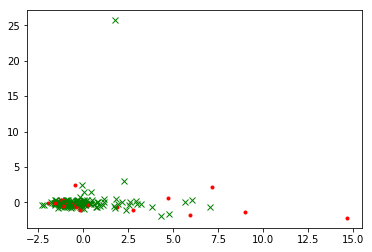

In [137]:
#Plot the points
def plotMoG(XY, symbol, color):
    i=0
    for x in XY.X:
        plt.plot (x[0], x[1], marker=symbol[XY.Y[i]], color=color[XY.Y[i]])
        i=i+1

plotMoG(v_y, ['.', 'x'], ['red', 'green'])